Analysis

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import os 
import pandas as pd 

In [3]:
df = pd.read_csv('./data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df1 = df.drop(df.columns[:2], axis=1)

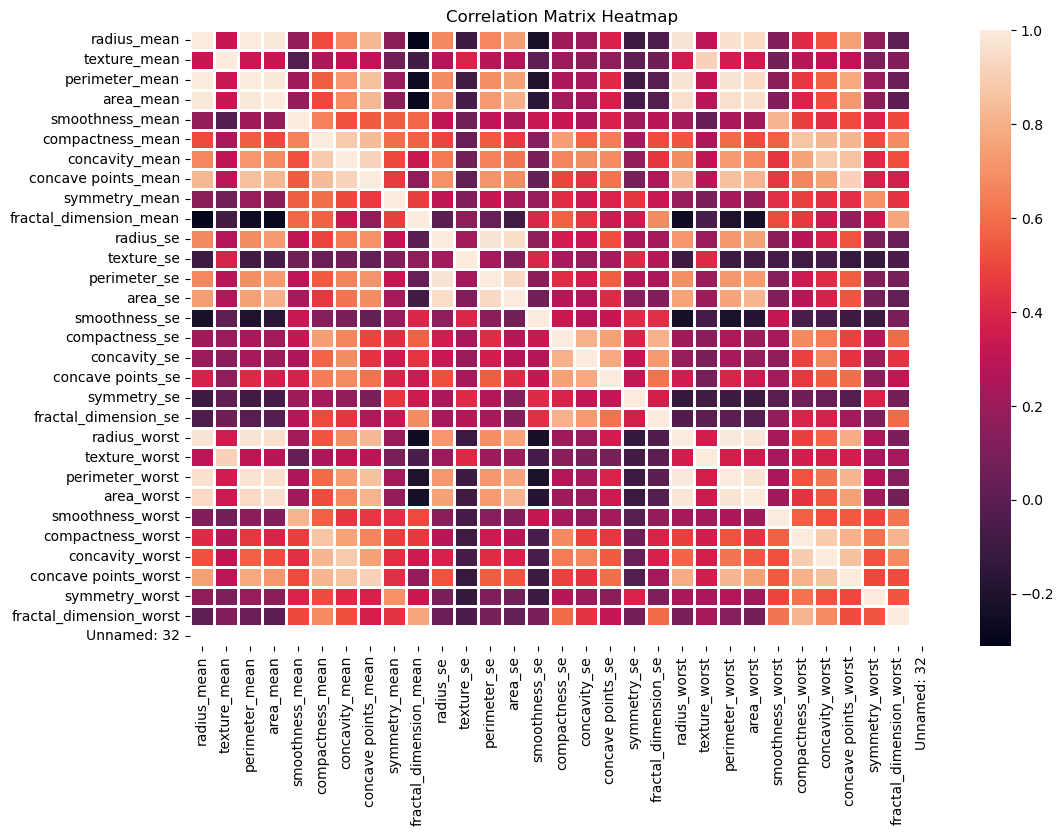

In [6]:
correlation_matrix = df1.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, linewidths=2)
plt.title('Correlation Matrix Heatmap')
plt.show()

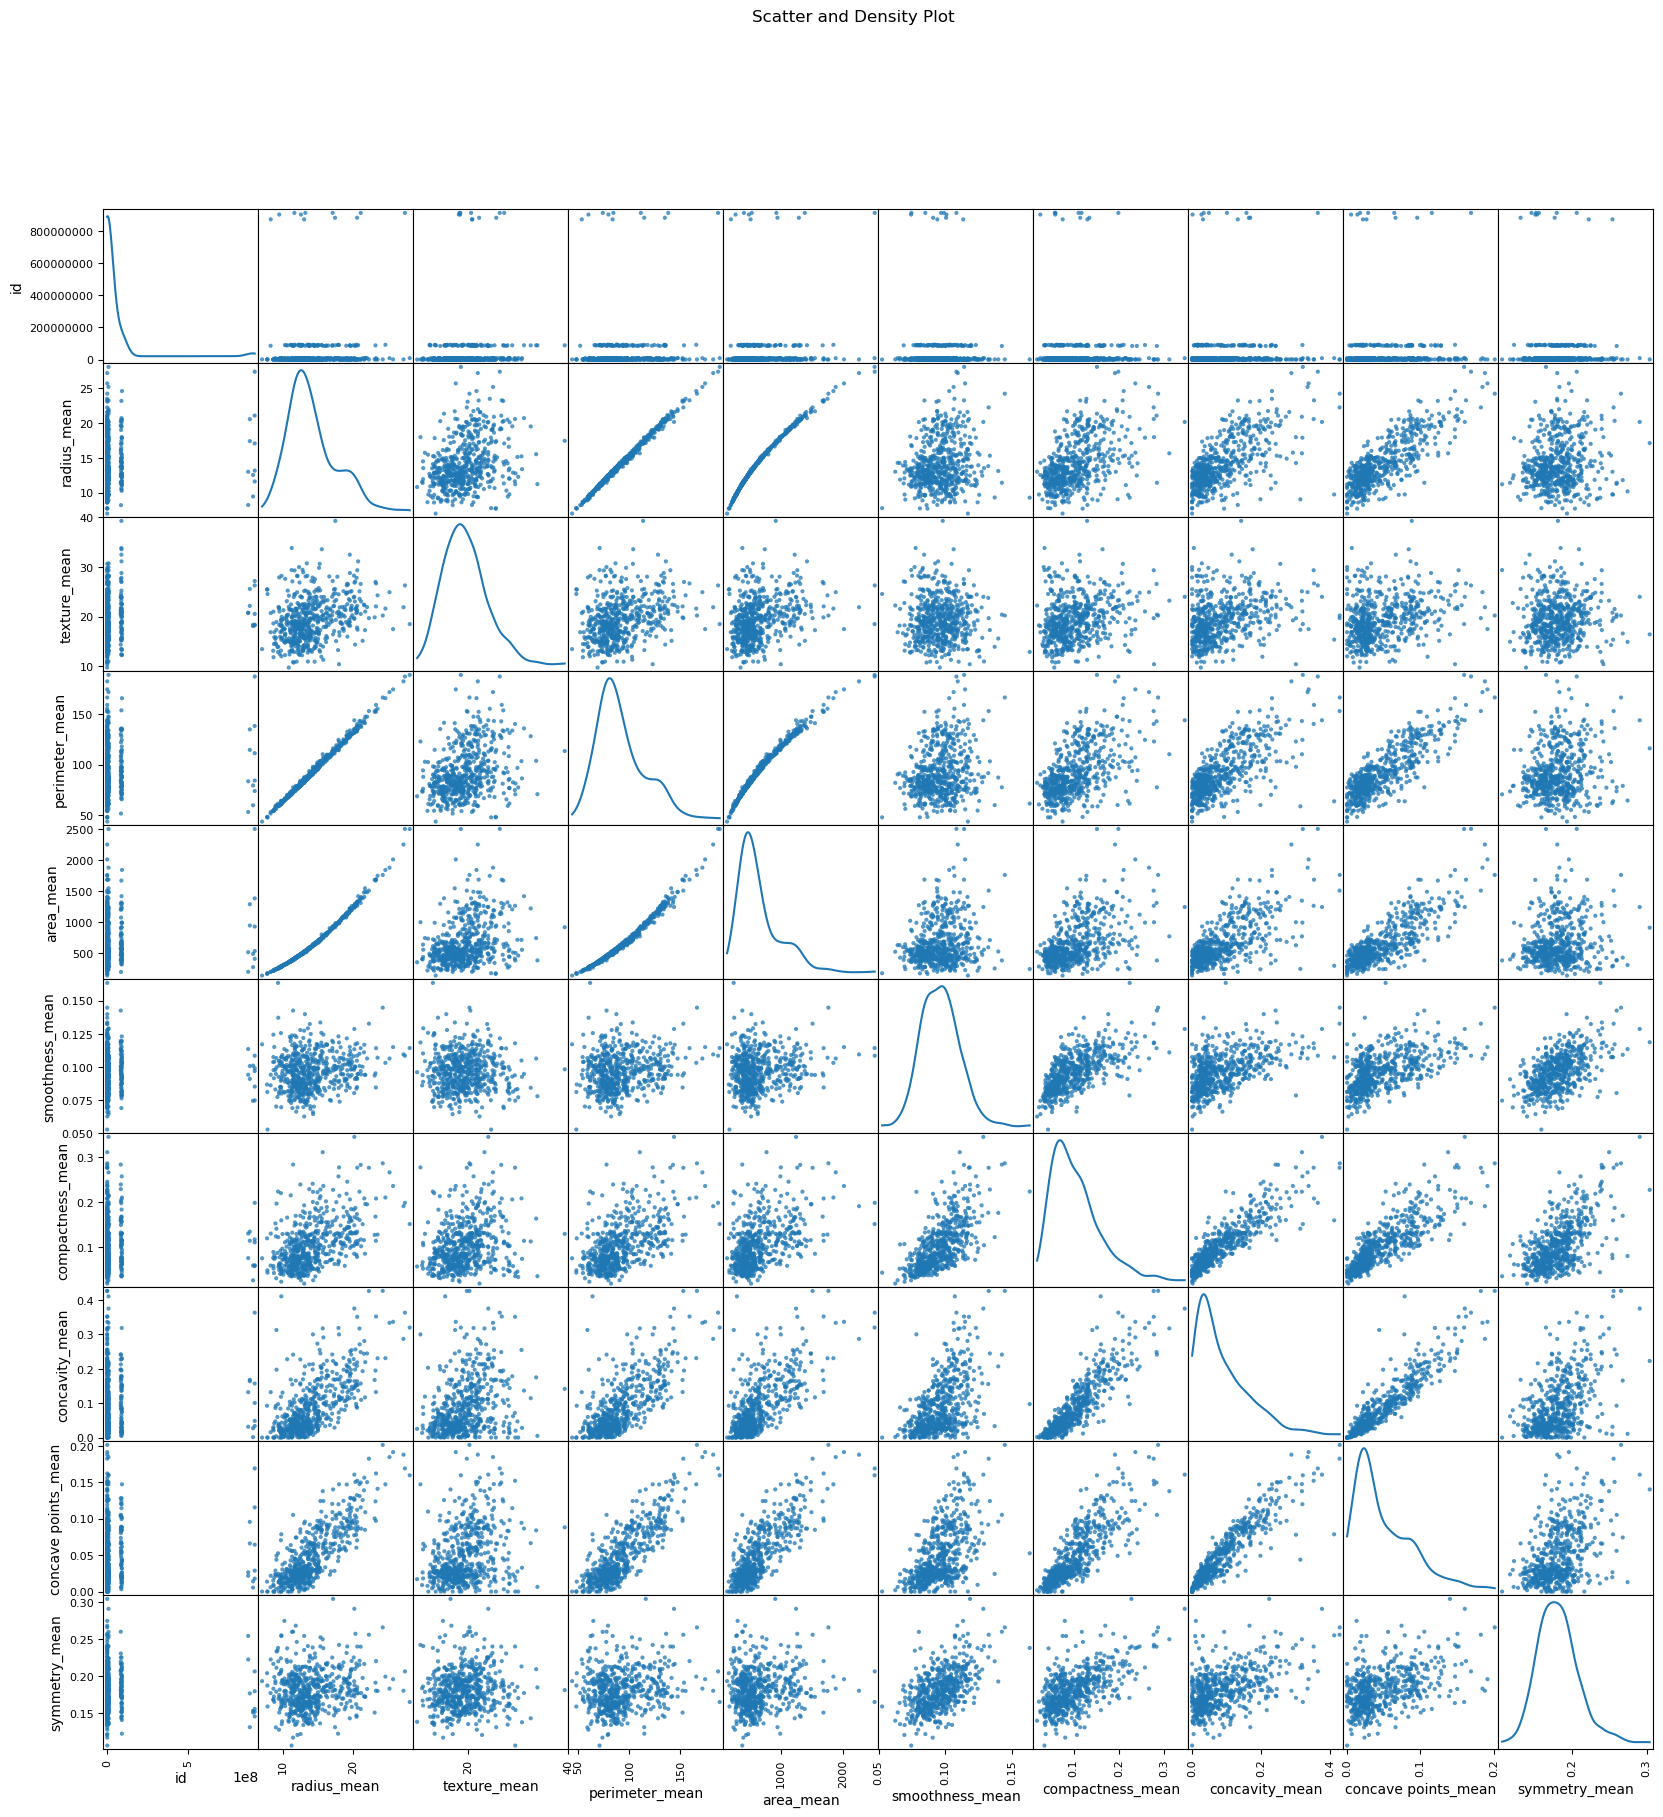

In [7]:
df1 = df.select_dtypes(include =[np.number])
columnNames = list(df1)
if len(columnNames) > 10: 
    columnNames = columnNames[:10]
df1 = df1[columnNames]
ax = pd.plotting.scatter_matrix(df1, alpha=0.75,figsize = [20,20], diagonal='kde')
corrs = df1.corr().values
plt.suptitle('Scatter and Density Plot')
plt.show()

Cleaning and preparing data

In [9]:
df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
df = df.drop(columns=['id', 'Unnamed: 32'], axis = 1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
print("Missing values in 'diagnosis':", df['diagnosis'].isna().sum())

Missing values in 'diagnosis': 0


In [13]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
            'compactness_mean', 'concavity_mean', 'concave points_mean',
            'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
            'compactness_worst', 'concavity_worst', 'concave points_worst',
            'symmetry_worst', 'fractal_dimension_worst']
X = df[features]
y = df['diagnosis']

In [15]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [16]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train_scaled.shape

(455, 17)

Using ANN

In [21]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1, activation='sigmoid')  
])

In [22]:
model.compile(loss="binary_crossentropy" ,optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(X_train, y_train, epochs=200, validation_split = 0.2)

Epoch 1/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.3543 - loss: 102.9056 - val_accuracy: 0.6374 - val_loss: 27.8770
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5915 - loss: 16.6523 - val_accuracy: 0.8352 - val_loss: 0.6238
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8436 - loss: 0.8244 - val_accuracy: 0.6923 - val_loss: 1.2130
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8278 - loss: 0.7261 - val_accuracy: 0.7473 - val_loss: 1.0128
Epoch 5/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8025 - loss: 0.9678 - val_accuracy: 0.9011 - val_loss: 0.4709
Epoch 6/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8421 - loss: 0.6431 - val_accuracy: 0.8571 - val_loss: 0.8229
Epoch 7/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9011 - loss: 0.4108 - val_accuracy: 0.8571 - val_loss: 0.7374
Epoch 8/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8916 - loss: 0.4419 - val_accuracy: 0.89

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,517 (41.09 KB)

 Trainable params: 3,505 (13.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,012 (27.39 KB)

In [25]:
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9637 - loss: 0.1086 


[0.11354178190231323, 0.9561403393745422]

In [26]:
model.save("Breast_cancer_detection(acc-93,valacc-90).h5")

Random Forest Classifier

In [28]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [29]:
class DynamicAdaptiveLearner:
    def __init__(self):
        self.classifier = RandomForestClassifier()

    def fit(self, X, y):
        print("Fitting model...")
        self.classifier.fit(X, y)

    def predict(self, X):
        return self.classifier.predict(X)

    def predict_proba(self, X):
        return self.classifier.predict_proba(X)

In [30]:
class AdaptiveIncrementalLearningForDynamicEnvironments:
    def __init__(self, base_classifier):
        self.base_classifier = base_classifier
        self.current_round = 0
        self.X_buffer = []
        self.y_buffer = []

    def _update_classifier(self):
        if self.X_buffer:
            print(f"Updating classifier at round {self.current_round}...")
            self.base_classifier.fit(self.X_buffer, self.y_buffer)
            self.X_buffer = []
            self.y_buffer = []

    def passive_learn(self, X, y):
        for x, label in zip(X.values, y.values):
            self.X_buffer.append(x)
            self.y_buffer.append(label)
        self._update_classifier()
        self.current_round += 1

    def predict(self, X):
        return self.base_classifier.predict(X)

    def predict_proba(self, X):
        return self.base_classifier.predict_proba(X)

In [31]:
class DynamicAdaptiveLearnerSVM:
    def __init__(self):
        self.classifier = SVC(probability=True)

    def fit(self, X, y):
        print("Fitting SVM model...")
        self.classifier.fit(X, y)

    def predict(self, X):
        return self.classifier.predict(X)

    def predict_proba(self, X):
        return self.classifier.predict_proba(X)

In [32]:
dal_classifier = DynamicAdaptiveLearner()
aidle_classifier = AdaptiveIncrementalLearningForDynamicEnvironments(dal_classifier)

In [33]:
num_rounds = 10
data_per_round = len(X_train) // num_rounds

In [34]:
train_accuracy = []
test_accuracy = []

In [35]:
for i in range(num_rounds):
    start_index = i * data_per_round
    end_index = (i + 1) * data_per_round if i < num_rounds - 1 else len(X_train)
    X_subset = X_train.iloc[start_index:end_index]
    y_subset = y_train.iloc[start_index:end_index]

    aidle_classifier.passive_learn(X_subset, y_subset)

    y_train_pred = aidle_classifier.predict(X_train)
    y_test_pred = aidle_classifier.predict(X_test)

    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Debugging: Print lengths to ensure they match
print(f"Length of train_accuracy: {len(train_accuracy)}")
print(f"Length of test_accuracy: {len(test_accuracy)}")
print(f"Expected number of rounds: {num_rounds}")

Updating classifier at round 0...
Fitting model...
Updating classifier at round 1...
Fitting model...


D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Updating classifier at round 2...
Fitting model...
Updating classifier at round 3...
Fitting model...


D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Updating classifier at round 4...
Fitting model...
Updating classifier at round 5...
Fitting model...


D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Updating classifier at round 6...
Fitting model...
Updating classifier at round 7...
Fitting model...


D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Updating classifier at round 8...
Fitting model...
Updating classifier at round 9...
Fitting model...
Length of train_accuracy: 10
Length of test_accuracy: 10
Expected number of rounds: 10


D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [36]:
dal_classifier_rf = DynamicAdaptiveLearner()
aidle_classifier_rf = AdaptiveIncrementalLearningForDynamicEnvironments(dal_classifier_rf)

dal_classifier_svm = DynamicAdaptiveLearnerSVM()
aidle_classifier_svm = AdaptiveIncrementalLearningForDynamicEnvironments(dal_classifier_svm)

# Simulate passive learning by incrementally updating the models
num_rounds = 10
data_per_round = len(X_train) // num_rounds

train_accuracy_rf = []
test_accuracy_rf = []
train_accuracy_svm = []
test_accuracy_svm = []

for i in range(num_rounds):
    start_index = i * data_per_round
    end_index = (i + 1) * data_per_round if i < num_rounds - 1 else len(X_train)
    X_subset = X_train.iloc[start_index:end_index]
    y_subset = y_train.iloc[start_index:end_index]

    # Train and predict with RandomForest
    aidle_classifier_rf.passive_learn(X_subset, y_subset)
    y_train_pred_rf = aidle_classifier_rf.predict(X_train)
    y_test_pred_rf = aidle_classifier_rf.predict(X_test)

    train_accuracy_rf.append(accuracy_score(y_train, y_train_pred_rf))
    test_accuracy_rf.append(accuracy_score(y_test, y_test_pred_rf))

    # Train and predict with SVM
    aidle_classifier_svm.passive_learn(X_subset, y_subset)
    y_train_pred_svm = aidle_classifier_svm.predict(X_train)
    y_test_pred_svm = aidle_classifier_svm.predict(X_test)

    train_accuracy_svm.append(accuracy_score(y_train, y_train_pred_svm))
    test_accuracy_svm.append(accuracy_score(y_test, y_test_pred_svm))


Updating classifier at round 0...
Fitting model...
Updating classifier at round 0...
Fitting SVM model...
Updating classifier at round 1...
Fitting model...


D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X 

Updating classifier at round 1...
Fitting SVM model...
Updating classifier at round 2...
Fitting model...
Updating classifier at round 2...
Fitting SVM model...
Updating classifier at round 3...
Fitting model...


D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X 

Updating classifier at round 3...
Fitting SVM model...
Updating classifier at round 4...
Fitting model...
Updating classifier at round 4...
Fitting SVM model...
Updating classifier at round 5...
Fitting model...


D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X 

Updating classifier at round 5...
Fitting SVM model...
Updating classifier at round 6...
Fitting model...
Updating classifier at round 6...
Fitting SVM model...
Updating classifier at round 7...
Fitting model...


D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X 

Updating classifier at round 7...
Fitting SVM model...
Updating classifier at round 8...
Fitting model...
Updating classifier at round 8...
Fitting SVM model...
Updating classifier at round 9...
Fitting model...
Updating classifier at round 9...
Fitting SVM model...


D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [37]:
print(f"Length of train_accuracy_rf: {len(train_accuracy_rf)}")
print(f"Length of test_accuracy_rf: {len(test_accuracy_rf)}")
print(f"Length of train_accuracy_svm: {len(train_accuracy_svm)}")
print(f"Length of test_accuracy_svm: {len(test_accuracy_svm)}")
print(f"Expected number of rounds: {num_rounds}")

Length of train_accuracy_rf: 10
Length of test_accuracy_rf: 10
Length of train_accuracy_svm: 10
Length of test_accuracy_svm: 10
Expected number of rounds: 10


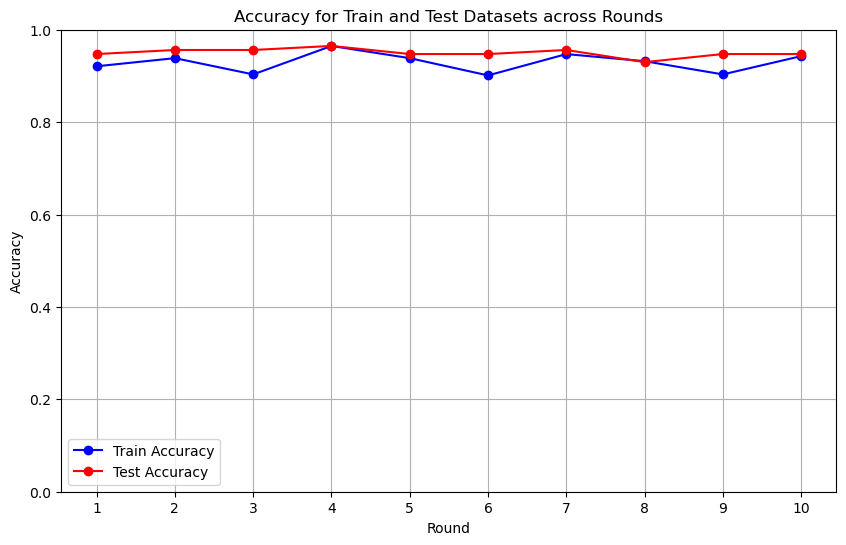

In [38]:
rounds = range(1, num_rounds + 1)

plt.figure(figsize=(10, 6))
plt.plot(rounds, train_accuracy, marker='o', linestyle='-', color='b', label='Train Accuracy')
plt.plot(rounds, test_accuracy, marker='o', linestyle='-', color='r', label='Test Accuracy')

plt.title('Accuracy for Train and Test Datasets across Rounds')
plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.xticks(rounds)
plt.legend()
plt.grid(True)
plt.ylim(0, 1)  # Ensure y-axis ranges from 0 to 1 for better accuracy visualization
plt.show()

In [40]:
final_train_accuracy = accuracy_score(y_train, y_train_pred)
final_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Test Accuracy: {final_test_accuracy:.4f}")

Final Training Accuracy: 0.9429
Final Test Accuracy: 0.9474


In [41]:
y_pred = aidle_classifier.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.4f}")

RMSE: 0.2294


D:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [42]:
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Confusion Matrix:
[[69  2]
 [ 4 39]]
Precision: 0.9512
Recall: 0.9070


In [ ]:
rounds = range(1, num_rounds + 1)

plt.figure(figsize=(12, 6))
plt.plot(rounds, train_accuracy_rf, marker='o', linestyle='-', color='b', label='RF Train Accuracy')
plt.plot(rounds, test_accuracy_rf, marker='o', linestyle='-', color='r', label='RF Test Accuracy')
plt.plot(rounds, train_accuracy_svm, marker='x', linestyle='--', color='g', label='SVM Train Accuracy')
plt.plot(rounds, test_accuracy_svm, marker='x', linestyle='--', color='y', label='SVM Test Accuracy')

plt.title('Accuracy for Train and Test Datasets across Rounds for RF and SVM')
plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.xticks(rounds)
plt.legend()
plt.grid(True)
plt.ylim(0, 1)  # Ensure y-axis ranges from 0 to 1 for better accuracy visualization
plt.show()